<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

# Условия задачи:

 - Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
 - При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
 - Бюджет на разработку скважин в регионе — 10 млрд рублей.
 - При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
 - После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
 
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Описание данных <a class="tocSkip">

<div style="border:solid green 5px; padding: 16px; border-radius: 10px"> 
<br> id — уникальный идентификатор скважины;
<br> f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
<br> product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats
pd.set_option('display.max_columns', None) #выведем все столбцы таблицы на экран

In [2]:
data1 = pd.read_csv("/datasets/geo_data_0.csv")
data2 = pd.read_csv("/datasets/geo_data_1.csv")
data3 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
#Дадим название таблицам
data1.name='Регион 1'
data2.name = 'Регион 2'
data3.name = 'Регион 3'

In [4]:
#Создадим функцию для отображения общей информации о таблице
def describe_data(df):
    print('Первые 10 строк таблицы:', df.name)
    display(df.head(10))
    print('Информация о таблице:', df.name)
    print(df.info(memory_usage='deep'))
    print('Количество пропусков в таблице:', df.name)
    print(df.isna().mean())
    print('Получение сводки по таблице:', df.name)
    display(df.describe().T)
    print('Количество дубликатов в таблице', df.name, ':', df.duplicated().sum()) 
    print('Распределение по объему запасов в скважине:', df.name) 
    sns.displot(df['product']) 

Первые 10 строк таблицы: Регион 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Информация о таблице: Регион 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB
None
Количество пропусков в таблице: Регион 1
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
Получение сводки по таблице: Регион 1


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


Количество дубликатов в таблице Регион 1 : 0
Распределение по объему запасов в скважине: Регион 1


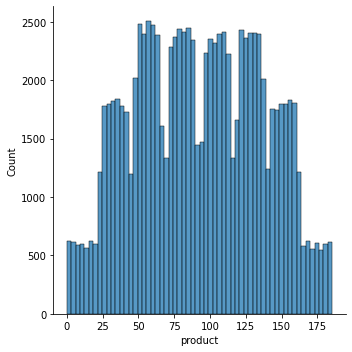

In [5]:
describe_data(data1) #Выведем информацию о таблице

Первые 10 строк таблицы: Регион 2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


Информация о таблице: Регион 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB
None
Количество пропусков в таблице: Регион 2
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
Получение сводки по таблице: Регион 2


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


Количество дубликатов в таблице Регион 2 : 0
Распределение по объему запасов в скважине: Регион 2


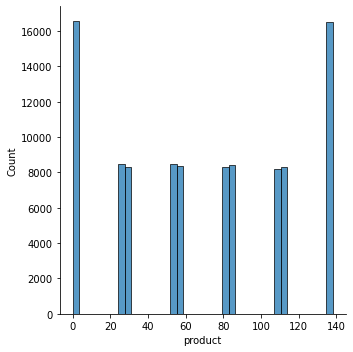

In [6]:
describe_data(data2) #Выведем информацию о таблице

Первые 10 строк таблицы: Регион 3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Информация о таблице: Регион 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 9.0 MB
None
Количество пропусков в таблице: Регион 3
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
Получение сводки по таблице: Регион 3


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Количество дубликатов в таблице Регион 3 : 0
Распределение по объему запасов в скважине: Регион 3


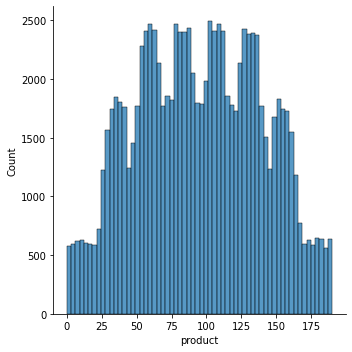

In [7]:
describe_data(data3) #Выведем информацию о таблице

In [8]:
# готовим выборки для обучения. Разбиваем на целевой признак и признаки
features_1=data1.drop(['product','id'],axis=1)
target_1=data1['product']

features_2=data2.drop(['product','id'],axis=1)
target_2=data2['product']

features_3=data3.drop(['product','id'],axis=1)
target_3=data3['product']

In [9]:
# Разбиваю датасет на 2 выборки:обучающую, валидационную (75:25)
features_train_1,features_valid_1,target_train_1,target_valid_1=train_test_split(features_1,target_1,test_size=.25,random_state=1234)
features_train_2,features_valid_2,target_train_2,target_valid_2=train_test_split(features_2,target_2,test_size=.25,random_state=1234)
features_train_3,features_valid_3,target_train_3,target_valid_3=train_test_split(features_3,target_3,test_size=.25,random_state=1234)

In [10]:
# Выведем итнформацию о количестве элементов после разбивки
print('Количество элементов в обучающей выборке:')
print('Регион 1',features_train_1.shape , target_train_1.shape)
print('Регион 1',features_train_2.shape , target_train_2.shape)
print('Регион 1',features_train_3.shape , target_train_3.shape)
print('Количество элементов в валидационной выборке:')
print('Регион 1',features_valid_1.shape , target_valid_1.shape)
print('Регион 1',features_valid_2.shape , target_valid_2.shape)
print('Регион 1',features_valid_3.shape , target_valid_3.shape)

Количество элементов в обучающей выборке:
Регион 1 (75000, 3) (75000,)
Регион 1 (75000, 3) (75000,)
Регион 1 (75000, 3) (75000,)
Количество элементов в валидационной выборке:
Регион 1 (25000, 3) (25000,)
Регион 1 (25000, 3) (25000,)
Регион 1 (25000, 3) (25000,)


### Вывод

Данные загружены и подготовлены. В каждой таблице 100000 строк. Тип данных в каждом столбце подходит для анализа. Пропущенных значений и дубликатов нет. Судя по столбцу product (объем запасов в скважине) данные распределены не нормально (это исправим на этапе работы с Bootstrap). Больше замечаний к данным нет.

## Обучение и проверка модели

In [11]:
# Обучение и проверка модели (Регион 1)
model_reg_1=LinearRegression() # инициализируем модель LinearRegression
model_reg_1.fit(features_train_1,target_train_1) # обучим модель на тренировочной выборке
predict_reg_1=model_reg_1.predict(features_valid_1) # получим предсказания модели на валидационной выборке
print('Регион 1:')
print('Средний запас фактического сырья:',target_valid_1.mean())
print('Средний запас предсказанного сырья:',predict_reg_1.mean())
print('RMSE:',np.sqrt(mean_squared_error(predict_reg_1,target_valid_1)))
print('MAE:',mean_absolute_error(predict_reg_1,target_valid_1))

Регион 1:
Средний запас фактического сырья: 92.57965325518721
Средний запас предсказанного сырья: 92.43045952558441
RMSE: 37.562394183637785
MAE: 30.938765880476645


In [12]:
# Обучение и проверка модели (Регион 2)
model_reg_2=LinearRegression() # инициализируем модель LinearRegression
model_reg_2.fit(features_train_2,target_train_2) # обучим модель на тренировочной выборке
predict_reg_2=model_reg_2.predict(features_valid_2) # получим предсказания модели на валидационной выборке
print('Регион 2:')
print('Средний запас фактического сырья:',target_valid_2.mean())
print('Средний запас предсказанного сырья:',predict_reg_2.mean())
print('RMSE:',np.sqrt(mean_squared_error(predict_reg_2,target_valid_2)))
print('MAE:',mean_absolute_error(predict_reg_2,target_valid_2))

Регион 2:
Средний запас фактического сырья: 68.80279604178406
Средний запас предсказанного сырья: 68.80248249798365
RMSE: 0.8939344738117704
MAE: 0.7208749581371285


In [13]:
# Обучение и проверка модели (Регион 1)
model_reg_3=LinearRegression() # инициализируем модель LinearRegression
model_reg_3.fit(features_train_3,target_train_3) # обучим модель на тренировочной выборке
predict_reg_3=model_reg_3.predict(features_valid_3) # получим предсказания модели на валидационной выборке
print('Регион 3:')
print('Средний запас фактического сырья:',target_valid_3.mean())
print('Средний запас предсказанного сырья:',predict_reg_3.mean())
print('RMSE:',np.sqrt(mean_squared_error(predict_reg_3,target_valid_3)))
print('MAE:',mean_absolute_error(predict_reg_3,target_valid_3))

Регион 3:
Средний запас фактического сырья: 94.97180046006052
Средний запас предсказанного сырья: 94.91573817913459
RMSE: 40.10318099258418
MAE: 32.86813268581066


### Вывод

Регион 1: на втором месте по средним запасам сырья (факт - 92,57, предсказ - 92,43) и на втором месте по корню из средней вадратичной ошибки (37,53).

Регион 2: на третьем месте по средним запасам сырья (факт - 68,80, предсказ - 68,80) и на первом месте по корню из средней вадратичной ошибки (0,89).

Регион 3: на первом месте по средним запасам сырья (факт - 94,97, предсказ - 94,91) и на третьем месте по корню из средней вадратичной ошибки (40,10).

## Подготовка к расчёту прибыли

In [14]:
OIL_FIELD=500 # При разведке региона проводится исследование 500 точек.
F_OIL_FIELD=200 # В итоге выбирают 200 лучших для разработки
BUDGET_REGION=10*(10**9) # Бюджет на разработку месторождений — 10 млрд рублей
COAST_ONE_WELL=BUDGET_REGION/F_OIL_FIELD # стоимость бурения одной скважины
BURREL=450 # Один баррель сырья приносит 450 рублей дохода.
NON_DAMAGE_POINT = COAST_ONE_WELL/(BURREL*1000) #умножаем на 1000, поскольку объемы указаны в тысячах баррелей

In [15]:
print("Достаточный объем добычи для безубыточной разработки:",NON_DAMAGE_POINT ,'тыс.бареллей')

Достаточный объем добычи для безубыточной разработки: 111.11111111111111 тыс.бареллей


In [16]:
print("Кол-во месторождений в Регионе 1 где объем добычи нефти более достаточного", len(data1[data1['product']>=NON_DAMAGE_POINT]))
print("Кол-во месторождений в Регионе 2 где объем добычи нефти более достаточного", len(data2[data2['product']>=NON_DAMAGE_POINT]))
print("Кол-во месторождений в Регионе 3 где объем добычи нефти более достаточного", len(data3[data3['product']>=NON_DAMAGE_POINT]))

Кол-во месторождений в Регионе 1 где объем добычи нефти более достаточного 36583
Кол-во месторождений в Регионе 2 где объем добычи нефти более достаточного 16537
Кол-во месторождений в Регионе 3 где объем добычи нефти более достаточного 38178


### Вывод

Минимальный объем добычи, для каждого месторождения из 200 лучших для разработки в регионе, должен составлять 111 тысяч баррелей нефти. В соответствии с данными, в каждом регионе имеется 16 до 38 тысяч подобных месторождений.

## Расчёт прибыли и рисков 

In [17]:
# Создадим функицию для расчета прибыли 
def profit(true_target, pred_target):
    sort_series = pd.Series(pred_target).sort_values(ascending=False)[:F_OIL_FIELD]
    true_target_sort = true_target.reset_index(drop = True)[sort_series.index]
    sum_true = true_target_sort.sum() 
    return (sum_true * BURREL*1000) - BUDGET_REGION

In [18]:
print('Прибыль с лучших 200 скважин в Регионе 1:', profit(target_valid_1, predict_reg_1))
print('Прибыль с лучших 200 скважин в Регионе 2:', profit(target_valid_2, predict_reg_2))
print('Прибыль с лучших 200 скважин в Регионе 3:', profit(target_valid_3, predict_reg_3))

Прибыль с лучших 200 скважин в Регионе 1: 3424026320.2475376
Прибыль с лучших 200 скважин в Регионе 2: 2415086696.681513
Прибыль с лучших 200 скважин в Регионе 3: 2554955424.433958


In [19]:
#Функция расчета рисков и прибыли
def confidence_interval(true_target,pred_target, df):
    state = np.random.RandomState(1234)
    samples = []
    for i in range(1000):
        sample = pd.Series(pred_target).sample(n = OIL_FIELD, replace=True, random_state=state)
        samples.append(profit(true_target,sample))
    samples = pd.Series(samples)
    print(df.name)
    print('Средняя прибыль', samples.mean())
#    print(samples.apply(lambda x: x < 0).sum()/len(samples)*100,"%") 2 способа нахождения процентиля
#    print(samples[samples < 0].count()/len(samples)*100,"%")
    print('Риск убытков',stats.percentileofscore(samples, 0),"%")
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return print('95% доверительный интервал:', round(lower,2), round(upper,2))

In [20]:
confidence_interval(target_valid_1,pd.Series(predict_reg_1), data1) #Регион 1

Регион 1
Средняя прибыль 379402878.218449
Риск убытков 7.2 %
95% доверительный интервал: -107976792.26 918803441.6


In [21]:
confidence_interval(target_valid_2,pd.Series(predict_reg_2), data2) #Регион 2

Регион 2
Средняя прибыль 429085147.9064184
Риск убытков 1.9 %
95% доверительный интервал: 32450558.07 847355452.1


In [22]:
confidence_interval(target_valid_3,pd.Series(predict_reg_3), data3) #Регион 3

Регион 3
Средняя прибыль 353931385.934333
Риск убытков 9.0 %
95% доверительный интервал: -210845231.1 892073818.45


### Вывод

Предлагаем регион 2 в качастве разработки месторождений. В данном регионе минимальный риск убытков (1,9%), с 95% вероятностью прибыль будет от 32 млн до 847 млн рублей и в этом регионе самая высокая средняя прибыль - 429 млн рублей.

## Общий вывод

<div style="border:solid green 5px; padding: 20px">
    
**<font color="green">Загрузка и подготовка данных</font>**    
<br>Данные загружены и подготовлены. В каждой таблице 100000 строк. Тип данных в каждом столбце подходит для анализа. Пропущенных значений и дубликатов нет. Судя по столбцу product (объем запасов в скважине) данные распределены не нормально (это исправим на этапе работы с Bootstrap). Больше замечаний к данным нет.
    
**<font color="green">Обучение и проверка модели</font>**      
<br>Регион 1: на втором месте по средним запасам сырья (факт - 92,57, предсказ - 92,43) и на втором месте по корню из средней вадратичной ошибки (37,53).
<br>Регион 2: на третьем месте по средним запасам сырья (факт - 68,80, предсказ - 68,80) и на первом месте по корню из средней вадратичной ошибки (0,89).
<br>Регион 3: на первом месте по средним запасам сырья (факт - 94,97, предсказ - 94,91) и на третьем месте по корню из средней вадратичной ошибки (40,10).
    
**<font color="green">Подготовка к расчёту прибыли</font>**      
<br>Минимальный объем добычи, для каждого месторождения из 200 лучших для разработки в регионе, должен составлять 111 тысяч баррелей нефти. В соответствии с данными, в каждом регионе имеется 16 до 38 тысяч подобных месторождений.
    
**<font color="green">Расчёт прибыли и рисков</font>**      
<br>Предлагаем регион 2 в качастве разработки месторождений. В данном регионе минимальный риск убытков (1,9%), с 95% вероятностью прибыль будет от 32 млн до 847 млн рублей и в этом регионе самая высокая средняя прибыль - 429 млн рублей.
    
**<font color="green">Общий вывод</font>**    
<br> Не смотря на наименьшие средние запасы сырья и максимально возможный доход (2,4 млрд. рублей), Регион 2 показал наулучшие результаты в данной работе. Вероятно, это связано с наиболее точным предсказанием модели.